## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 4</center></h1>
### <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Hai Nguyen</center></h1>
##### <h1><center>Due day: 11:59 pm, 21 October, Friday, 2022 </center></h1>
#### All solutions must be in one pdf file except codes.

## **Question 1** (+30) (Probalistic linear regression )
Generating 6 data samples for the problem by this polynomial functions (use the below given code for create $x^i$)
$$ f(x) = .5 - {x} - .5 {x}^2 - 2 {x}^3 + 5 {x}^4$$
Then adding noise:
$y^i = f(x^i) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \delta^2)$, and noise level $\delta = 0.2$

The approximation model is 2nd order.

In assignment 3, question 3. We have computed the posterior distribution by using $\theta^*$ (the MAP point) to achieve the mean, and keep the variance the same as the noise level $\delta^2$. 

1. Instead of that, using Bayesian Predictions, finding the mean and variance of 
$$ P(y | x, \mathcal{D}) = \int_\theta P(y \mid x, \theta) P(\theta \mid \mathcal{D}) d\theta. $$

2. Plotting the the uncertainty band with the range of x [0,1] (Plotting training data samples will help answer the part Q1.3).
3. Discuss the result by comparing with the results that you achieved in assignment 3 (just using the MAP point).


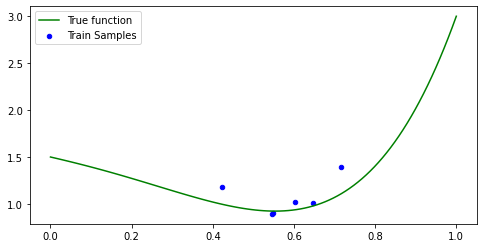

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
np.random.seed(0)

## please keep the below codes for generating x, DO NOT CHANGE!
# ==========================================================================================
n_train_samples = 6
X_train = np.sort(np.random.rand(n_train_samples)) 

order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f



X_test = np.linspace(0., 1., 100)
plt.plot(X_test,true_fn(X_test),'g',label = 'True function')
plt.scatter(X_train,true_fn(X_train) + (np.random.randn(n_train_samples)) * 0.2, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.legend()

# [CONTINUE YOUR WORK FROM HERE!]



## **Question 2** (+20 +10 bonous)

1. In lecture 7, we can maximize the likelihood 
$$\max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log P(x^{(i)} | y^{(i)} ; \mu_k, \Sigma_k)
= \max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log \mathcal{N}(x^{(i)} | \mu_k, \Sigma_k)$$
over the Gaussian parameters. Prove that the empirical means and covariances of each class are
\begin{align*}
\mu_k & = \frac{\sum_{i: y^{(i)} = k} x^{(i)}}{n_k} \\
\Sigma_k & = \frac{\sum_{i: y^{(i)} = k} (x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^\top}{n_k}.
\end{align*}

2. (bonous 10+) In lecture 7, using $P_\theta(y = i) = \phi_i$ requires the constraint $\sum_{k = 1}^K\phi_k = 1$. Using Lagrangian multipliers method shows that $\theta_k = \frac{n_k}{n}$. (Please see Spring_21__Lecture_Notes_Math_II.pdf/section 3.6.2 in the suplementary material.)


## Question 3: (+30) (Generative VS Discriminative Models)

We are going to use the Iris flower dataset. We will use three features sepal length (cm), sepal width (cm), petal length (cm) to classify types of flowers in generative model.
1. Compute the emprical means and covariance matrices for each type of flowers.
2. Generating new flowers, denoted as set $S$, from the learned propability and plotting these generated flowers in 3D. Observe and discuss your results.
3. We assume that set $S$ is test data. Classify the test data $S$ using the generative model that you have found in question 1. Discuss you results.
4. We assume that set $S$ is test data. Using logistic regression to training the model, then verify the learn model with test data $S$. Compare and discuss your results with question 3.3

## Question 4: (+20) (Bernoulli Naive Bayes Model)

1. From the lecture 8, we have the formula for the optimal value of $\psi_{jk}$
\begin{align*}
\psi_{jk} = \frac{n_{jk}}{n_k}.
\end{align*}
Derive this formula.
2. In lecture 8, we have classify the the document by bag of word method. We now make a simple comparison between BoW method and logistic regression. The training data: removing 2 class of type 2 and 3 from the data (the code is 4-class data). By that, our data becomes a binary classification problem. Performing BoW method and logistic regression method for the obtained 2-class data. Discussion the results.

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# for this lecture, we will restrict our attention to just 4 different newsgroups:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# load the dataset
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# vectorize the training set
count_vect = CountVectorizer(binary=True, max_features=1000)
y_train = twenty_train.target
X_train = count_vect.fit_transform(twenty_train.data).toarray()
X_train.shape

print('NOTE: our data has 4 class group')
print(y_train)

print('You need to remove class 2 and 3 to create the 2-class data')


NOTE: our data has 4 class group
[1 1 3 ... 2 2 2]
You need to remove class 2 and 3 to create the 2-class data
